In [2]:
#import modules
import re
import json
import datetime, time
import pytz

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')

from sklearn.feature_extraction import text
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import nltk

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#read file and build basic lists
file_dir = "/Users/NickyMc/Desktop/5/ECE219_tweet_data/tweets_#superbowl.txt"

read_file= open(file_dir)
text_doc =[]
key_doc = []

In [3]:
#determine location
def in_place(location,exclude,include):
    location = location.replace(',','')
    location = location.split()
    for item in include:
        if item in location:
            return True
    return False

In [4]:
count = 0
for line in read_file.readlines():
    json_object = json.loads(line)
    
    location = json_object["tweet"]["user"]["location"]
    in_was = in_place(location,['DC','D.C'],['Washington','WA','Seattle'])
    in_mas = in_place(location,[],['Boston','MA','Massachusetts'])
    if in_was:
        key_doc.append(0)
        text_doc.append(json_object["tweet"]["text"])
        count +=1
    elif in_mas:
        key_doc.append(1)
        text_doc.append(json_object["tweet"]["text"])
        count +=1
read_file.close()
print(count)

43921


In [5]:
#determine trst and train part of dataset
ratio = 0.9
split_num = int(len(key_doc)*ratio)
text_trained_raw = text_doc[0:split_num]
key_trained_raw = key_doc[0:split_num]
text_test_raw = text_doc[split_num:]
key_test_raw = key_doc[split_num:]

stop_words_skt = text.ENGLISH_STOP_WORDS
stop_words_en = stopwords.words('english')

c_vectorizer = CountVectorizer(stop_words = set.union(set(stop_words_en),set(stop_words_skt)), min_df = 3)

text_trained_2 = c_vectorizer.fit_transform(text_trained_raw)
text_test_2 = c_vectorizer.transform(text_test_raw)

In [6]:
tfidf_transformer = TfidfTransformer()
text_trained_tfidf = tfidf_transformer.fit_transform(text_trained_2)
text_test_tfidf = tfidf_transformer.transform(text_test_2)

In [7]:
from sklearn import metrics
import itertools
def plot_confusion_matrix(target, labels, normalize=False):
    """
    This function geives credit to : website
    "http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html"
    """
    cm = metrics.confusion_matrix(target, labels)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap = plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
                 color="gray")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix, without normalization


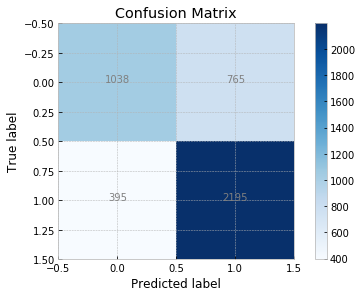

precision: 0.7415540540540541
recall: 0.8474903474903475
accuracy: 0.7359435465513317
Area under curve:: 0.7115987511162218
Confusion matrix, without normalization


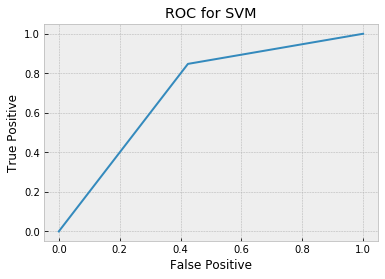

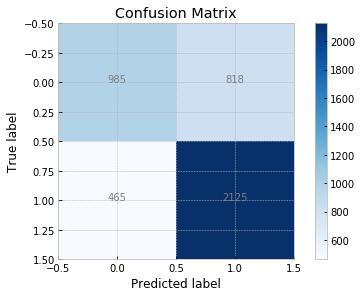

precision: 0.7220523275569147
recall: 0.8204633204633205
accuracy: 0.7079444570908263
Area under curve:: 0.6833875115905066


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion matrix, without normalization


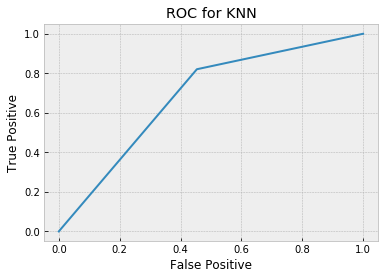

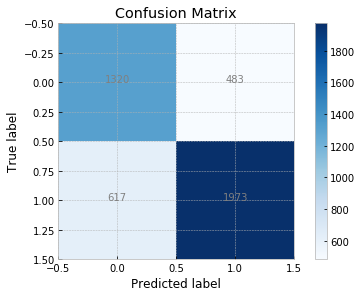

precision: 0.8033387622149837
recall: 0.7617760617760618
accuracy: 0.7496016389710903
Area under curve:: 0.7469446032673986


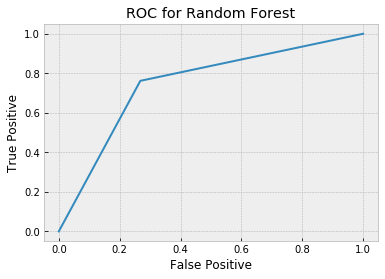

In [8]:

#SVM Method
plt.figure(1)
SVM_Method = SVC(C = 0.1, gamma='auto_deprecated', coef0=0.0, shrinking=True, kernel='linear', probability=True )
SVM_Method.fit(text_trained_tfidf, key_trained_raw)
pre_result = cross_val_predict(SVM_Method, text_test_tfidf, key_test_raw,cv=10)
plot_confusion_matrix(key_test_raw, pre_result)
prec = precision_score(key_test_raw, pre_result)
rec = recall_score(key_test_raw, pre_result)
accu = accuracy_score(key_test_raw, pre_result)

print("precision:", prec)
print("recall:", rec)
print("accuracy:", accu)


false_, true_, _ = roc_curve(key_test_raw, pre_result)
area = auc(false_,true_)
print("Area under curve::",area)
plt.plot(false_, true_)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC for SVM')


#KNN method
KNN_method = KNeighborsClassifier()
plt.figure(2)

KNN_method.fit(text_trained_tfidf, key_trained_raw)
pre_result = cross_val_predict(KNN_method, text_test_tfidf, key_test_raw,cv=10)
plot_confusion_matrix(key_test_raw, pre_result)
prec = precision_score(key_test_raw, pre_result)
rec = recall_score(key_test_raw, pre_result)
accu = accuracy_score(key_test_raw, pre_result)
#print("confusion_matrix:", confusion_matrix_)
print("precision:", prec)
print("recall:", rec)
print("accuracy:", accu)


false_, true_, _ = roc_curve(key_test_raw, pre_result)
area = auc(false_,true_)
print("Area under curve::",area)
plt.plot(false_, true_)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC for KNN')



#Random forest method
plt.figure(3)
Rd_method = RandomForestClassifier()

Rd_method.fit(text_trained_tfidf, key_trained_raw)
pre_result = cross_val_predict(Rd_method, text_test_tfidf, key_test_raw, cv=10)
confusion_matrix_ = plot_confusion_matrix(key_test_raw, pre_result)
precision_score_ = precision_score(key_test_raw, pre_result)
recall_score_ = recall_score(key_test_raw, pre_result)
accuracy_score_ = accuracy_score(key_test_raw, pre_result)

print("precision:", precision_score_)
print("recall:", recall_score_)
print("accuracy:", accuracy_score_)

false_, true_, _ = roc_curve(key_test_raw, pre_result)
area = auc(false_,true_)
print("Area under curve::",area)
plt.plot(false_, true_)

plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC for Random Forest')

plt.show()
